### Fourier Transform
The Fourier Transform is a mathematical technique that allows us to represent a signal in terms of its frequency components. It takes a time-domain signal and transforms it into the frequency domain. This is useful because it allows us to analyze the different frequency components of a signal and see how they contribute to the overall signal.

In the frequency domain, we can see the amplitude and phase of each frequency component of the signal. This allows us to filter out unwanted frequencies or noise, and also to modify the signal by adding or subtracting specific frequency components.

The Fourier Transform has many applications in signal processing, image processing, and data analysis. It is used in audio and video compression, filtering, and equalization, as well as in spectroscopy and other scientific fields.

By using the Fourier Transform, we can:

- Analyze the frequency components of a signal
- Filter out unwanted frequencies or noise
- Modify the signal by adding or subtracting specific frequency components
- Compress or decompress audio and video signals
- Perform spectral analysis in scientific fields



In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


### 1. Generate and visual a signal with noise:
Let's generate a signal that consists of combining two sine waves of different frequencies(50 Hz and 100 Hz) with some Gaussian noise added to it. This means that the values of the noise follow a normal distribution, which is a bell-shaped curve with a mean of zero and a standard deviation of 0.1. Gaussian noise is a common type of noise used in signal processing and is often used to model various types of real-world noise, such as thermal noise in electronic systems. Plot the noisy signal to see what it looks like.

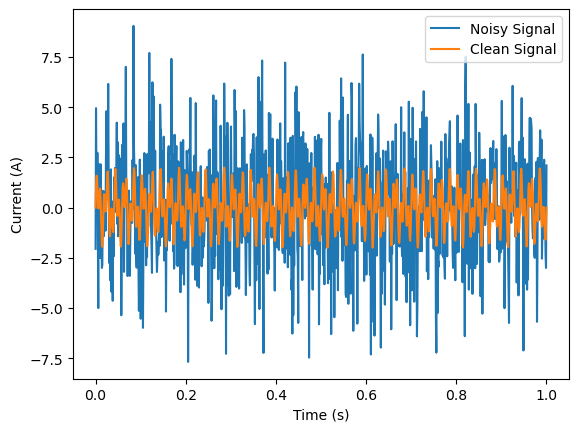

In [2]:
# generate signal with noise
t = np.linspace(0, 1, 1000)
f1 = 50
f2 = 120
#signal = np.sin(2*np.pi*f1*t) + 0.5*np.sin(2*np.pi*f2*t)  #sum of 2 frequencies
#noisy_signal = signal + np.random.normal(0, 0.1, len(t))  #Signal with noise

signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)  #sum of 2 frequencies
noisy_signal = signal + 2.5* np.random.randn(len(t))  #Signal with noise

plt.plot(t,noisy_signal,label = 'Noisy Signal')
plt.plot(t, signal,label='Clean Signal', )

plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()
plt.show()



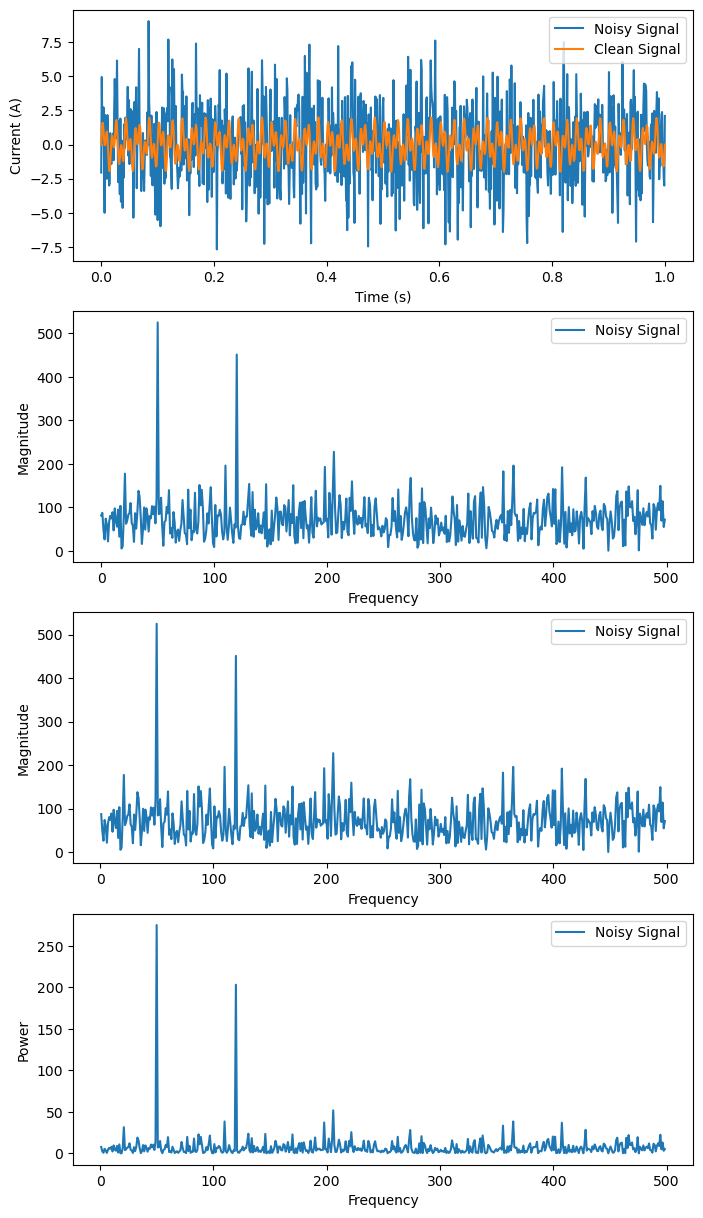

In [17]:
### Compute the Fast Fourier transform
dt = t[1]- t[0]
n = len(t)
fft = np.fft.fft(noisy_signal,n)  #Compute the FFT
fft_amp = np.abs(fft) 
#PSD = fft *np.conj(fft) # Power spectral density. This is the fft squared = (np.abs(fft) **2)/n 
freqs = np.fft.fftfreq(len(noisy_signal), t[1]-t[0])


fig,axs = plt.subplots(2,1,  figsize=(8, 15))
plt.sca(axs[0])
plt.plot(t,noisy_signal,label = 'Noisy Signal')
plt.plot(t, signal,label='Clean Signal', )
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.legend()


plt.sca(axs[1])
plt.plot(freqs[0: n//2],fft_amp[0:n//2],label = 'Noisy Signal')
plt.xlabel ("Frequency")
plt.ylabel ("Magnitude")
plt.legend()



### 3. Apply a window function:
Window functions are used in signal processing to minimize spectral leakage, which occurs when the frequency spectrum of a finite-length signal appears to "leak" into neighboring frequency bins due to the limited duration of the signal. We can apply a window function to our signal to reduce spectral leakage. `Hamming` window function is used.

A window function is a mathematical function that is used to taper a signal before performing a Fourier Transform. The goal of the window function is to reduce the effect of spectral leakage, which occurs when the signal contains frequency components that are not exact multiples of the sampling frequency.

Spectral leakage can cause the energy in a signal to spread across multiple frequency bins, making it more difficult to accurately identify the frequency components of the signal. A window function reduces the effect of spectral leakage by tapering the signal at the edges, reducing the amplitude of the signal near the beginning and end of the window.

Applying a window function is not strictly necessary, but it can improve the accuracy of the Fourier Transform, especially when the signal contains frequency components that are close to the sampling frequency or when the signal is of finite length. However, it is important to choose the right window function for the signal and the analysis task, as different window functions have different properties.

If you do not apply a window function, it may change the frequency content of the signal, especially if the signal contains frequency components that are close to the sampling frequency. The spectral leakage can cause these frequency components to appear in adjacent frequency bins, which can make it difficult to accurately identify the frequencies of the signal.

In [ ]:
# apply window function
window = np.hamming(len(signal))
signal_windowed = signal * window

# plot original signal and windowed signal side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(t, signal)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Original Signal')
ax2.plot(t, signal_windowed)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.set_title('Windowed Signal')
plt.show()




### 3. Compute and visualise the Fourier Transform:
Now we can compute the Fourier Transform of the windowed signal and the original signal using the `np.fft.fft` function.

In [ ]:
# compute Fourier Transform
freqs_wind = np.fft.fftfreq(len(signal_windowed), t[1]-t[0])
fft_wind = np.fft.fft(signal_windowed)
n = len(signal)

freqs = np.fft.fftfreq(len(signal), t[1]-t[0])
fft = np.fft.fft(signal)

# plot Fourier Transform
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))



ax1.plot(freqs, np.abs(fft))
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Magnitude')
ax1.set_title('Fourier Transform of Original Signal')


ax2.plot(freqs_wind, np.abs(fft_wind))
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Magnitude')
ax2.set_title('Fourier Transform of Windowed Signal')

plt.show()



### 4. Apply a filter to remove noise:
We can apply a `filter` to the Fourier Transform to remove the noise from the signal. One simple approach is to set all frequency components with a magnitude below a certain threshold to zero.

In [ ]:
# apply filter to Fourier Transform
fft_filtered = fft.copy()
fft_filtered[np.abs(fft) < 100] = 0

fft_filtered_wind = fft_wind.copy()
fft_filtered_wind[np.abs(fft_wind) < 100] = 0


# combine frequencies and filtered Fourier Transform
filter_orig = np.concatenate((freqs.reshape(-1,1), np.abs(fft_filtered).reshape(-1,1)), axis=1)
filter_wind = np.concatenate((freqs.reshape(-1,1),np.abs(fft_filtered_wind).reshape(-1,1)), axis =1)



### 5. Compute and visualise the inverse Fourier Transform:
Now we can compute the inverse Fourier Transform of the filtered signal using the `np.fft.ifft` function to obtain the cleaned-up signal in the time domain and Let's plot the cleaned-up signal to see how well we were able to remove the noise

In [ ]:
# compute inverse Fourier Transform
signal_cleaned = np.fft.ifft(fft_filtered).real
signal_cleaned_wind = np.fft.ifft(fft_filtered_wind).real



# plot original signal and cleaned-up signal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(t, signal, label='Original Signal')
ax1.plot(t, signal_cleaned, label='Cleaned-up Signal')
ax1.set_title('Original vs Cleaned-up Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax2.plot(t, signal_windowed, label='Windowed Signal')
ax2.plot(t, signal_cleaned_wind, label='Cleaned-up Windowed Signal')
ax2.set_title('Windowed Signal vs Cleaned-up Windowed Signal')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude')
ax2.legend()
plt.show()

### Resources

Great videos

- [Denoising Data with Python FFT](https://www.youtube.com/watch?v=s2K1JfNR7Sc&t=312s)